In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Define functions that calculate Weighted Distance and Weighted Distance Matrix

In [14]:
def weightedL2(a,b,w):
    q = a-b
    return np.sqrt((w*q*q).sum())

def dist_func(dataset,weight):
    length = len(dataset)
    res = np.array([([0]*length) for i in range(0,length)],dtype=np.float64)
    for i in range(0,length):
        for j in range(i,length):
            temp = weightedL2(dataset[i],dataset[j],weight)
            res[i][j] = temp
            res[j][i] = temp
    return res 

# Read data from CSV file

In [2]:
df = pd.read_csv('./wine.csv', names= ['Class', 'Alcohol', 'Malic acid', 
                                              'Ash', 'Alcalinity of ash ', 'Magnesium',
                                              'Total phenols', 'Flavanoids','Nonflavanoid phenols',
                                              'Proanthocyanins','Color intensity','Hue' , 
                                              'OD280/OD315 of diluted wines','Proline'
                                             ])

# Preprocess the data(clean and scale)

Extract the name of features

In [ ]:
columnName = df.columns[1:]

 Extract the feature from pandas dataframe according to the feature names

In [4]:
dt4Scale = df[columnName]

StandardScaler the data

In [5]:
scaled_dt = StandardScaler().fit_transform(dt4Scale)

Store the scaled data into pandas dataframe

In [6]:
scaled_df = pd.DataFrame(scaled_dt, columns=columnName)

Extract the class of records

In [7]:
className = df['Class']

Combine the class and features according to the index

In [8]:
 df_clean = pd.concat([className, scaled_df], axis=1, join_axes=[df.index])

Measure the similarity of records using euclidean distance

In [19]:
Initial_Weight = np.array([1/len(scaled_dt[0])  for i in range(0,len(scaled_dt[0]))])

In [22]:
similarity = dist_func(scaled_dt,Initial_Weight)

set up the parameter of MDS

In [24]:
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                       random_state=seed, dissimilarity="precomputed", n_jobs=1)

 Reduce the dimensions of dataset to 2 dimensions

In [25]:
dt_2Dims = mds.fit(similarity).embedding_

In [27]:
 df_2Dims = pd.DataFrame(dt_2Dims, columns=['x', 'y'])

In [29]:
dt_allFeatures = pd.concat([df_clean, df_2Dims], axis=1, join_axes=[df.index])

In [30]:
df4Vis = dt_allFeatures[['Class', 'x', 'y']]

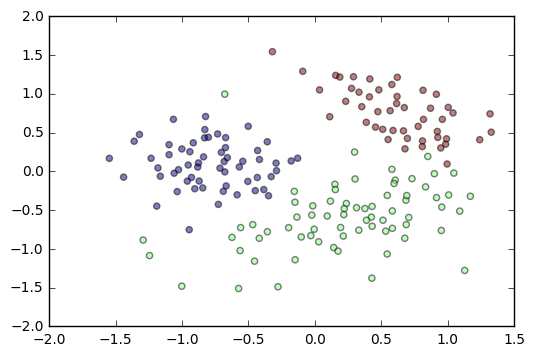

In [32]:
plt.scatter(df4Vis["x"], df4Vis["y"],c=df4Vis["Class"], alpha=0.5)